In [5]:
import pandas as pd
from rdkit import Chem
from chembl_webresource_client.new_client import new_client
from rdkit.Chem import PandasTools
from IPython.display import HTML

# Search for Target protein

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id='CHEMBL1937').filter(standard_type="IC50")

In [7]:
df = pd.DataFrame.from_dict(res)

In [8]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,157538,[],CHEMBL697298,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,nM,UO_0000065,None,3300.0
1,None,167391,[],CHEMBL697298,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,nM,UO_0000065,None,47.0
2,None,180807,[],CHEMBL697298,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,nM,UO_0000065,None,3.9
3,None,1266083,[],CHEMBL697297,Inhibition of Histone deacetylase 2 (HDAC2) ac...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,1266088,[],CHEMBL697297,Inhibition of Histone deacetylase 2 (HDAC2) ac...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,None,24514649,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5056855,Inhibition of human HDAC2 assessed as target a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.359
2742,None,24514650,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5056855,Inhibition of human HDAC2 assessed as target a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.20800000000000002
2743,None,24514651,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5056855,Inhibition of human HDAC2 assessed as target a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.534
2744,None,24515601,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5057115,Inhibition of full length recombinant C-termin...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,10^-5M,UO_0000065,None,10.0


In [9]:
df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

# Handling data

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

In [10]:
df2 = df[df.pchembl_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,157538,[],CHEMBL697298,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,nM,UO_0000065,None,3300.0
1,None,167391,[],CHEMBL697298,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,nM,UO_0000065,None,47.0
2,None,180807,[],CHEMBL697298,Inhibitory concentration against human Histone...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,nM,UO_0000065,None,3.9
5,None,1270389,[],CHEMBL697297,Inhibition of Histone deacetylase 2 (HDAC2) ac...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.27
6,None,1271620,[],CHEMBL697297,Inhibition of Histone deacetylase 2 (HDAC2) ac...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,None,24514648,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5056855,Inhibition of human HDAC2 assessed as target a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.17800000000000002
2741,None,24514649,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5056855,Inhibition of human HDAC2 assessed as target a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.359
2742,None,24514650,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5056855,Inhibition of human HDAC2 assessed as target a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.20800000000000002
2743,None,24514651,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5056855,Inhibition of human HDAC2 assessed as target a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Histone deacetylase 2,9606,None,None,IC50,uM,UO_0000065,None,0.534


In [11]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value','pchembl_value', 'document_chembl_id']

In [12]:
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id
0,CHEMBL2093007,C/C=C1\NC(=O)[C@@H](CSC)NC(=O)[C@@H](C(C)C)CC(...,3300.0,5.48,CHEMBL1145900
1,CHEMBL343448,C/C=C1\NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H...,47.0,7.33,CHEMBL1145900
2,CHEMBL146250,C/C=C1\NC(=O)[C@@H](CS)NC(=O)[C@@H](C(C)C)NC(=...,3.9,8.41,CHEMBL1145900
5,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,270.0,6.57,CHEMBL1137945
6,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,200.0,6.70,CHEMBL1137945
...,...,...,...,...,...
2740,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,178.0,6.75,CHEMBL5055650
2741,CHEMBL5077168,CCc1c(C(=O)Nc2cc(/C=C/C(=O)NO)ccc2OC)[nH]c(C)c...,359.0,6.45,CHEMBL5055650
2742,CHEMBL5080049,COc1ccc(S(=O)(=O)n2ccc(/C=C/C(=O)NO)c2)cc1NC(=...,208.0,6.68,CHEMBL5055650
2743,CHEMBL5083849,Cc1[nH]c(C(=O)Nc2cc(S(=O)(=O)N3CCOCC3)ccc2OCCC...,534.0,6.27,CHEMBL5055650


In [13]:
def convert_smi_to_canon_smi(smi):
    canon_smi = Chem.MolToSmiles(Chem.MolFromSmiles(smi),isomericSmiles = False)
    return canon_smi 

In [14]:
df3["canonical_smiles"] = df3.apply(lambda x: convert_smi_to_canon_smi(x.canonical_smiles), axis=1)

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id
0,CHEMBL2093007,CC=C1NC(=O)C(CSC)NC(=O)C(C(C)C)CC(=O)CC(C=CCCS...,3300.0,5.48,CHEMBL1145900
1,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,47.0,7.33,CHEMBL1145900
2,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,3.9,8.41,CHEMBL1145900
5,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,270.0,6.57,CHEMBL1137945
6,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,200.0,6.70,CHEMBL1137945
...,...,...,...,...,...
2740,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,178.0,6.75,CHEMBL5055650
2741,CHEMBL5077168,CCc1c(C(=O)Nc2cc(C=CC(=O)NO)ccc2OC)[nH]c(C)c1C...,359.0,6.45,CHEMBL5055650
2742,CHEMBL5080049,COc1ccc(S(=O)(=O)n2ccc(C=CC(=O)NO)c2)cc1NC(=O)...,208.0,6.68,CHEMBL5055650
2743,CHEMBL5083849,Cc1[nH]c(C(=O)Nc2cc(S(=O)(=O)N3CCOCC3)ccc2OCCC...,534.0,6.27,CHEMBL5055650


In [16]:
df3['pchembl_value'] = pd.to_numeric(df3['pchembl_value'], downcast="float")

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
mean_std = df3.groupby(['canonical_smiles'], as_index=False).agg({'pchembl_value':['mean','std']})
mean_std

canonical_smiles pchembl_value  \
                                                                 mean   
0                 C#CCOc1ccc(C=NNC(=O)CCCCCCC(=O)NO)cc1      8.680000   
1             C#CCOc1ccc(C=NNC(=O)c2cccc(C(=O)NO)c2)cc1      5.200000   
2     C#Cc1ccc(CNC(=O)OC2CC(C)C=C3C=CC(C)C(CCC4CC(O[...      6.050000   
3     C#Cc1ccc(NC(=O)OC2CC(C)C=C3C=CC(C)C(CCC4CC(O[S...      6.330000   
4      C#Cc1cccc(Nc2ncnc3cc(OC)c(OCCCCCCC(=O)NO)cc23)c1      7.900000   
...                                                 ...           ...   
1681  [N-]=[N+]=NCc1cc(N=[N+]=[N-])cc(C(=O)Nc2cc(-c3...      5.216667   
1682  [N-]=[N+]=NCc1cc(N=[N+]=[N-])cc(C(=O)Nc2ccc(-c...      6.110000   
1683    [N-]=[N+]=Nc1ccc(C(=O)Nc2cc(-c3ccccc3)ccc2N)cc1      5.983333   
1684     [N-]=[N+]=Nc1ccc(C(=O)Nc2cc(-c3cccs3)ccc2N)cc1      6.206666   
1685  [N-]=[N+]=Nc1cccc(COC(=O)NCc2ccc(C(=O)Nc3cc(-c...      5.973333   

                
           std  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
1681  0.438444  
1682       NaN  
1683  0.695006  
1684  0.731118  
1685  0.540494  

[1686 rows x 3 columns]

In [18]:
df4 = df3.merge(mean_std, on=['canonical_smiles'])

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  validate=validate,
C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [19]:
df4

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,"(pchembl_value, mean)","(pchembl_value, std)"
0,CHEMBL2093007,CC=C1NC(=O)C(CSC)NC(=O)C(C(C)C)CC(=O)CC(C=CCCS...,3300.0,5.48,CHEMBL1145900,5.480000,NaN
1,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,47.0,7.33,CHEMBL1145900,7.883333,1.236406
2,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,1.0,9.00,CHEMBL2062402,7.883333,1.236406
3,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,1.0,9.00,CHEMBL3352121,7.883333,1.236406
4,CHEMBL343448,CC=C1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)...,6070.0,5.22,CHEMBL3621100,7.883333,1.236406
...,...,...,...,...,...,...,...
2208,CHEMBL5088430,CN1c2ccc(F)cc2C(=O)N2CCc3c([nH]c4ccc(OCc5ccc(C...,42000.0,4.38,CHEMBL5046291,4.380000,NaN
2209,CHEMBL5094795,CCc1c(C(=O)Nc2cccc(C=CC(=O)NO)c2)[nH]c(C)c1C(C)=O,168.0,6.78,CHEMBL5055650,6.780000,NaN
2210,CHEMBL5077168,CCc1c(C(=O)Nc2cc(C=CC(=O)NO)ccc2OC)[nH]c(C)c1C...,359.0,6.45,CHEMBL5055650,6.450000,NaN
2211,CHEMBL5080049,COc1ccc(S(=O)(=O)n2ccc(C=CC(=O)NO)c2)cc1NC(=O)...,208.0,6.68,CHEMBL5055650,6.680000,NaN


In [20]:
df4[('pchembl_value', 'std')] = df4[('pchembl_value', 'std')]. fillna (0)

In [21]:
#keep only SD less thab 0.5 SD
df2_dub = df4[(df4[('pchembl_value', 'std')] < 0.5)]
df2_dub

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,"(pchembl_value, mean)","(pchembl_value, std)"
0,CHEMBL2093007,CC=C1NC(=O)C(CSC)NC(=O)C(C(C)C)CC(=O)CC(C=CCCS...,3300.0,5.48,CHEMBL1145900,5.48,0.000000
10,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,3.9,8.41,CHEMBL1145900,8.63,0.311127
11,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,1.4,8.85,CHEMBL3621100,8.63,0.311127
12,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,270.0,6.57,CHEMBL1137945,6.57,0.000000
13,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,200.0,6.70,CHEMBL1137945,6.70,0.000000
...,...,...,...,...,...,...,...
2208,CHEMBL5088430,CN1c2ccc(F)cc2C(=O)N2CCc3c([nH]c4ccc(OCc5ccc(C...,42000.0,4.38,CHEMBL5046291,4.38,0.000000
2209,CHEMBL5094795,CCc1c(C(=O)Nc2cccc(C=CC(=O)NO)c2)[nH]c(C)c1C(C)=O,168.0,6.78,CHEMBL5055650,6.78,0.000000
2210,CHEMBL5077168,CCc1c(C(=O)Nc2cc(C=CC(=O)NO)ccc2OC)[nH]c(C)c1C...,359.0,6.45,CHEMBL5055650,6.45,0.000000
2211,CHEMBL5080049,COc1ccc(S(=O)(=O)n2ccc(C=CC(=O)NO)c2)cc1NC(=O)...,208.0,6.68,CHEMBL5055650,6.68,0.000000


In [22]:
df2_nr = df2_dub.drop_duplicates(subset='canonical_smiles', keep='first')
df2_nr

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,"(pchembl_value, mean)","(pchembl_value, std)"
0,CHEMBL2093007,CC=C1NC(=O)C(CSC)NC(=O)C(C(C)C)CC(=O)CC(C=CCCS...,3300.0,5.48,CHEMBL1145900,5.48,0.000000
10,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,3.9,8.41,CHEMBL1145900,8.63,0.311127
12,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,270.0,6.57,CHEMBL1137945,6.57,0.000000
13,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,200.0,6.70,CHEMBL1137945,6.70,0.000000
14,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,19000.0,4.72,CHEMBL1137945,4.72,0.000000
...,...,...,...,...,...,...,...
2208,CHEMBL5088430,CN1c2ccc(F)cc2C(=O)N2CCc3c([nH]c4ccc(OCc5ccc(C...,42000.0,4.38,CHEMBL5046291,4.38,0.000000
2209,CHEMBL5094795,CCc1c(C(=O)Nc2cccc(C=CC(=O)NO)c2)[nH]c(C)c1C(C)=O,168.0,6.78,CHEMBL5055650,6.78,0.000000
2210,CHEMBL5077168,CCc1c(C(=O)Nc2cc(C=CC(=O)NO)ccc2OC)[nH]c(C)c1C...,359.0,6.45,CHEMBL5055650,6.45,0.000000
2211,CHEMBL5080049,COc1ccc(S(=O)(=O)n2ccc(C=CC(=O)NO)c2)cc1NC(=O)...,208.0,6.68,CHEMBL5055650,6.68,0.000000


In [23]:
df2_nr.rename(columns = {('pchembl_value', 'mean'):'pchembl_value_mean',('pchembl_value', 'std'):'pchembl_value_std'}, inplace = True )

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df2_nr

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,document_chembl_id,pchembl_value_mean,pchembl_value_std
0,CHEMBL2093007,CC=C1NC(=O)C(CSC)NC(=O)C(C(C)C)CC(=O)CC(C=CCCS...,3300.0,5.48,CHEMBL1145900,5.48,0.000000
10,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,3.9,8.41,CHEMBL1145900,8.63,0.311127
12,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,270.0,6.57,CHEMBL1137945,6.57,0.000000
13,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,200.0,6.70,CHEMBL1137945,6.70,0.000000
14,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,19000.0,4.72,CHEMBL1137945,4.72,0.000000
...,...,...,...,...,...,...,...
2208,CHEMBL5088430,CN1c2ccc(F)cc2C(=O)N2CCc3c([nH]c4ccc(OCc5ccc(C...,42000.0,4.38,CHEMBL5046291,4.38,0.000000
2209,CHEMBL5094795,CCc1c(C(=O)Nc2cccc(C=CC(=O)NO)c2)[nH]c(C)c1C(C)=O,168.0,6.78,CHEMBL5055650,6.78,0.000000
2210,CHEMBL5077168,CCc1c(C(=O)Nc2cc(C=CC(=O)NO)ccc2OC)[nH]c(C)c1C...,359.0,6.45,CHEMBL5055650,6.45,0.000000
2211,CHEMBL5080049,COc1ccc(S(=O)(=O)n2ccc(C=CC(=O)NO)c2)cc1NC(=O)...,208.0,6.68,CHEMBL5055650,6.68,0.000000


In [25]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value','pchembl_value_mean', 'pchembl_value_std', 'document_chembl_id']

In [26]:
df5=df2_nr[selection]
df5

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value_mean,pchembl_value_std,document_chembl_id
0,CHEMBL2093007,CC=C1NC(=O)C(CSC)NC(=O)C(C(C)C)CC(=O)CC(C=CCCS...,3300.0,5.48,0.000000,CHEMBL1145900
10,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,3.9,8.63,0.311127,CHEMBL1145900
12,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,270.0,6.57,0.000000,CHEMBL1137945
13,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,200.0,6.70,0.000000,CHEMBL1137945
14,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,19000.0,4.72,0.000000,CHEMBL1137945
...,...,...,...,...,...,...
2208,CHEMBL5088430,CN1c2ccc(F)cc2C(=O)N2CCc3c([nH]c4ccc(OCc5ccc(C...,42000.0,4.38,0.000000,CHEMBL5046291
2209,CHEMBL5094795,CCc1c(C(=O)Nc2cccc(C=CC(=O)NO)c2)[nH]c(C)c1C(C)=O,168.0,6.78,0.000000,CHEMBL5055650
2210,CHEMBL5077168,CCc1c(C(=O)Nc2cc(C=CC(=O)NO)ccc2OC)[nH]c(C)c1C...,359.0,6.45,0.000000,CHEMBL5055650
2211,CHEMBL5080049,COc1ccc(S(=O)(=O)n2ccc(C=CC(=O)NO)c2)cc1NC(=O)...,208.0,6.68,0.000000,CHEMBL5055650


In [27]:
def remove_salt(smi):
    if '.' in smi:
        smi='SALT_MIX'
    
    return smi

In [28]:
df5["canonical_smiles"] = df5.apply(lambda x: remove_salt(x.canonical_smiles), axis=1)

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df6 = df5[(df5[('canonical_smiles')] != 'SALT_MIX')]

In [30]:
df6

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value_mean,pchembl_value_std,document_chembl_id
0,CHEMBL2093007,CC=C1NC(=O)C(CSC)NC(=O)C(C(C)C)CC(=O)CC(C=CCCS...,3300.0,5.48,0.000000,CHEMBL1145900
10,CHEMBL146250,CC=C1NC(=O)C(CS)NC(=O)C(C(C)C)NC(=O)CC(C=CCCS)...,3.9,8.63,0.311127,CHEMBL1145900
12,CHEMBL336935,O=CN(O)CCCCCC(C(=O)Nc1ccc2ncccc2c1)C(=O)Nc1ccc...,270.0,6.57,0.000000,CHEMBL1137945
13,CHEMBL140525,O=CN(O)CCCCCC(C(=O)Nc1cnc2ccccc2c1)C(=O)Nc1cnc...,200.0,6.70,0.000000,CHEMBL1137945
14,CHEMBL141082,O=CN(O)CCCCCC(=O)Nc1ccccc1,19000.0,4.72,0.000000,CHEMBL1137945
...,...,...,...,...,...,...
2208,CHEMBL5088430,CN1c2ccc(F)cc2C(=O)N2CCc3c([nH]c4ccc(OCc5ccc(C...,42000.0,4.38,0.000000,CHEMBL5046291
2209,CHEMBL5094795,CCc1c(C(=O)Nc2cccc(C=CC(=O)NO)c2)[nH]c(C)c1C(C)=O,168.0,6.78,0.000000,CHEMBL5055650
2210,CHEMBL5077168,CCc1c(C(=O)Nc2cc(C=CC(=O)NO)ccc2OC)[nH]c(C)c1C...,359.0,6.45,0.000000,CHEMBL5055650
2211,CHEMBL5080049,COc1ccc(S(=O)(=O)n2ccc(C=CC(=O)NO)c2)cc1NC(=O)...,208.0,6.68,0.000000,CHEMBL5055650


In [31]:
df6.sort_values(by='pchembl_value_std')

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value_mean,pchembl_value_std,document_chembl_id
0,CHEMBL2093007,CC=C1NC(=O)C(CSC)NC(=O)C(C(C)C)CC(=O)CC(C=CCCS...,3300.0,5.480000,0.000000,CHEMBL1145900
1596,CHEMBL4288220,CCC(CCCC(=O)Nc1ccccc1)CCC(=O)NO,4900.0,5.310000,0.000000,CHEMBL4251567
1595,CHEMBL4250582,C[Si](O)(O)CCCCCCC(=O)Nc1ccccc1,6300.0,5.200000,0.000000,CHEMBL4229328
1594,CHEMBL113537,O=C(CCCCCCC(=O)C(F)(F)F)Nc1ccccc1,1400.0,5.850000,0.000000,CHEMBL4229328
1593,CHEMBL4225451,O=C(CCCCCCNC(=O)c1cc(-c2ccc(F)cc2)[nH]n1)NO,40.0,7.400000,0.000000,CHEMBL4219109
...,...,...,...,...,...,...
355,CHEMBL272980,Nc1ccccc1NC(=O)c1ccc(CNc2nccc(-c3cccnc3)n2)cc1,290.0,6.837778,0.475441,CHEMBL1155041
1281,CHEMBL3673102,Nc1ccc(-c2cccs2)cc1NC(=O)c1ccc(CNC(=O)c2cc3ccc...,7760.0,5.450000,0.480832,CHEMBL3638911
22,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,73.0,6.929007,0.484748,CHEMBL1137945
1709,CHEMBL3693786,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2Cl)nc...,318.0,6.783333,0.490748,CHEMBL4373747


In [32]:
data=df6.drop(['standard_value', 'pchembl_value_std' ], axis=1)

In [33]:
data.describe()

,pchembl_value_mean
count,1611.000000
mean,6.449844
std,1.074605
min,4.000000
25%,5.720000
50%,6.420000
75%,7.185000
max,9.520000


# Creating training and test samples

In [35]:
data=data.sort_values(by='pchembl_value_mean')
data.head(30)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id
513,CHEMBL1767029,CNC(=O)C(CCCCCCC(=O)Nc1ccccc1)=NO,4.00,CHEMBL1765034
1531,CHEMBL4218825,CCOc1ccc(C2c3ccccc3CCN2CCC(=O)NO)cc1,4.00,CHEMBL4190328
977,CHEMBL3260858,O=C(NC(C(=O)O)c1ccccc1)c1cccc(=S)n1O,4.02,CHEMBL3616411
517,CHEMBL1767046,CNC(=O)C(CCCCCC(NCc1ccc(OC)cc1)C(=O)Nc1ccccc1)=NO,4.02,CHEMBL1765034
489,CHEMBL1164212,CC(CCCCNC(=O)CS)C1CCC2C(=CC=C3CC(O)CC(O)C3)CCC...,4.02,CHEMBL1165922
490,CHEMBL1164244,CNC(=O)C(=O)CCCCC(C)C1CCC2C(=CC=C3CC(O)CC(O)C3...,4.04,CHEMBL1165922
1253,CHEMBL3966165,CC1(C)C(=O)N(c2ccc(C#N)c(C(F)(F)F)c2)C(=S)N1c1...,4.06,CHEMBL3862016
605,CHEMBL2057829,[N-]=[N+]=NCCC(=O)Nc1ccc(C(=O)Nc2cc(N=[N+]=[N-...,4.07,CHEMBL2057127
616,CHEMBL2170174,COc1cc(COc2ccc(NC(=O)CCCCCCC(=O)OCc3ccc(CN=[N+...,4.10,CHEMBL2169804
624,CHEMBL2178344,O=C(NO)c1cccc(-c2cn(CCc3ccccc3)nn2)c1,4.12,CHEMBL2176939


In [36]:
data_test=data.loc[::5]
data_test.head(20)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id
513,CHEMBL1767029,CNC(=O)C(CCCCCCC(=O)Nc1ccccc1)=NO,4.00,CHEMBL1765034
490,CHEMBL1164244,CNC(=O)C(=O)CCCCC(C)C1CCC2C(=CC=C3CC(O)CC(O)C3...,4.04,CHEMBL1165922
617,CHEMBL2170173,COc1cc(COc2ccc(NC(=O)CCCCCCC(=O)OCCN=[N+]=[N-]...,4.14,CHEMBL2169804
526,CHEMBL1800375,Cc1cc(O)nc(SCC(=O)c2ccc(Cl)cc2)n1,4.17,CHEMBL1800036
1272,CHEMBL3953547,CCCCCC(CCCCCC(=O)Nc1ccccc1)C(=O)NO,4.24,CHEMBL3877334
1534,CHEMBL4208780,O=C(CCN1CCc2ccccc2C1c1ccc(-c2ccccc2)cc1)NO,4.33,CHEMBL4190328
2208,CHEMBL5088430,CN1c2ccc(F)cc2C(=O)N2CCc3c([nH]c4ccc(OCc5ccc(C...,4.38,CHEMBL5046291
814,CHEMBL3353053,Cn1cccc1C(=O)N1CCn2cc(C(=O)NO)cc2C1,4.41,CHEMBL3351349
492,CHEMBL1243289,O=C(CCCCC1CC(C(=O)NO)=NO1)Nc1ccccc1,4.44,CHEMBL1240475
634,CHEMBL2323289,CCCCCCCC(=O)SCCC=CC1CC(=O)NCc2nc(cs2)-c2cn(nn2...,4.49,CHEMBL2321647


In [37]:
data_work=data.drop(data.loc[::5].index)

In [38]:
data.head(30)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id
513,CHEMBL1767029,CNC(=O)C(CCCCCCC(=O)Nc1ccccc1)=NO,4.00,CHEMBL1765034
1531,CHEMBL4218825,CCOc1ccc(C2c3ccccc3CCN2CCC(=O)NO)cc1,4.00,CHEMBL4190328
977,CHEMBL3260858,O=C(NC(C(=O)O)c1ccccc1)c1cccc(=S)n1O,4.02,CHEMBL3616411
517,CHEMBL1767046,CNC(=O)C(CCCCCC(NCc1ccc(OC)cc1)C(=O)Nc1ccccc1)=NO,4.02,CHEMBL1765034
489,CHEMBL1164212,CC(CCCCNC(=O)CS)C1CCC2C(=CC=C3CC(O)CC(O)C3)CCC...,4.02,CHEMBL1165922
490,CHEMBL1164244,CNC(=O)C(=O)CCCCC(C)C1CCC2C(=CC=C3CC(O)CC(O)C3...,4.04,CHEMBL1165922
1253,CHEMBL3966165,CC1(C)C(=O)N(c2ccc(C#N)c(C(F)(F)F)c2)C(=S)N1c1...,4.06,CHEMBL3862016
605,CHEMBL2057829,[N-]=[N+]=NCCC(=O)Nc1ccc(C(=O)Nc2cc(N=[N+]=[N-...,4.07,CHEMBL2057127
616,CHEMBL2170174,COc1cc(COc2ccc(NC(=O)CCCCCCC(=O)OCc3ccc(CN=[N+...,4.10,CHEMBL2169804
624,CHEMBL2178344,O=C(NO)c1cccc(-c2cn(CCc3ccccc3)nn2)c1,4.12,CHEMBL2176939


In [39]:
data_work.head(25)

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id
1531,CHEMBL4218825,CCOc1ccc(C2c3ccccc3CCN2CCC(=O)NO)cc1,4.00,CHEMBL4190328
977,CHEMBL3260858,O=C(NC(C(=O)O)c1ccccc1)c1cccc(=S)n1O,4.02,CHEMBL3616411
517,CHEMBL1767046,CNC(=O)C(CCCCCC(NCc1ccc(OC)cc1)C(=O)Nc1ccccc1)=NO,4.02,CHEMBL1765034
489,CHEMBL1164212,CC(CCCCNC(=O)CS)C1CCC2C(=CC=C3CC(O)CC(O)C3)CCC...,4.02,CHEMBL1165922
1253,CHEMBL3966165,CC1(C)C(=O)N(c2ccc(C#N)c(C(F)(F)F)c2)C(=S)N1c1...,4.06,CHEMBL3862016
605,CHEMBL2057829,[N-]=[N+]=NCCC(=O)Nc1ccc(C(=O)Nc2cc(N=[N+]=[N-...,4.07,CHEMBL2057127
616,CHEMBL2170174,COc1cc(COc2ccc(NC(=O)CCCCCCC(=O)OCc3ccc(CN=[N+...,4.10,CHEMBL2169804
624,CHEMBL2178344,O=C(NO)c1cccc(-c2cn(CCc3ccccc3)nn2)c1,4.12,CHEMBL2176939
1543,CHEMBL4214401,O=C(NO)c1cccc(S(=O)(=O)NC(Cc2c[nH]c3ccccc23)C(...,4.15,CHEMBL4196083
527,CHEMBL1800383,CCOC(=O)CC(=O)CSc1nc(C)cc(O)n1,4.16,CHEMBL1800036


# Creating sdf files

Creating test set

In [40]:
PandasTools.AddMoleculeColumnToFrame(data_test, 'canonical_smiles', 'Molecule')

C:\Users\Developer\Anaconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\PandasTools.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id,Molecule
513,CHEMBL1767029,CNC(=O)C(CCCCCCC(=O)Nc1ccccc1)=NO,4.00,CHEMBL1765034,
490,CHEMBL1164244,CNC(=O)C(=O)CCCCC(C)C1CCC2C(=CC=C3CC(O)CC(O)C3)CCCC21C,4.04,CHEMBL1165922,
617,CHEMBL2170173,COc1cc(COc2ccc(NC(=O)CCCCCCC(=O)OCCN=[N+]=[N-])cc2)cc(N=[N+]=[N-])c1,4.14,CHEMBL2169804,
526,CHEMBL1800375,Cc1cc(O)nc(SCC(=O)c2ccc(Cl)cc2)n1,4.17,CHEMBL1800036,
1272,CHEMBL3953547,CCCCCC(CCCCCC(=O)Nc1ccccc1)C(=O)NO,4.24,CHEMBL3877334,

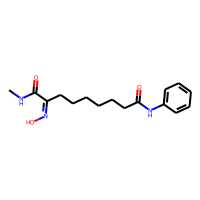
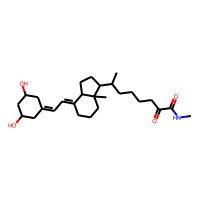
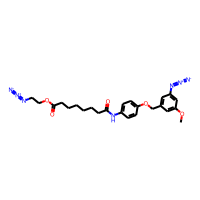
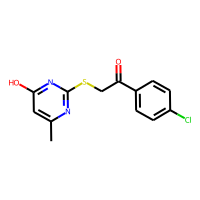
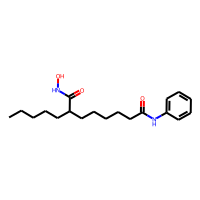

In [41]:
HTML(data_test.head().to_html())

In [42]:
PandasTools.WriteSDF(data_test, 'HDAC2_test.sdf', molColName='Molecule', properties=list(data.columns))

Creating work set

In [43]:
PandasTools.AddMoleculeColumnToFrame(data_work, 'canonical_smiles', 'Molecule')

,molecule_chembl_id,canonical_smiles,pchembl_value_mean,document_chembl_id,Molecule
1531,CHEMBL4218825,CCOc1ccc(C2c3ccccc3CCN2CCC(=O)NO)cc1,4.00,CHEMBL4190328,
977,CHEMBL3260858,O=C(NC(C(=O)O)c1ccccc1)c1cccc(=S)n1O,4.02,CHEMBL3616411,
517,CHEMBL1767046,CNC(=O)C(CCCCCC(NCc1ccc(OC)cc1)C(=O)Nc1ccccc1)=NO,4.02,CHEMBL1765034,
489,CHEMBL1164212,CC(CCCCNC(=O)CS)C1CCC2C(=CC=C3CC(O)CC(O)C3)CCCC21C,4.02,CHEMBL1165922,
1253,CHEMBL3966165,CC1(C)C(=O)N(c2ccc(C#N)c(C(F)(F)F)c2)C(=S)N1c1ccc(C(=O)NCCOCCC(=O)NO)c(F)c1,4.06,CHEMBL3862016,

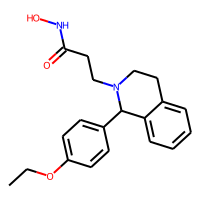
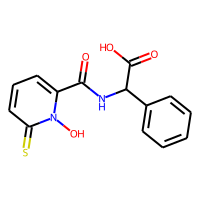
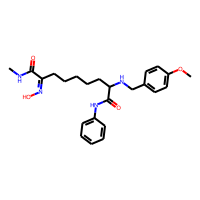
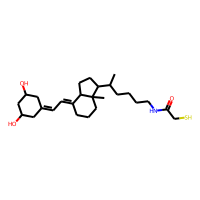
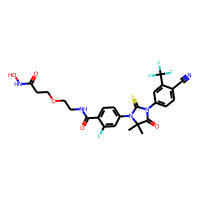

In [44]:
HTML(data_work.head().to_html())

In [45]:
PandasTools.WriteSDF(data_work, 'HDAC2_work.sdf', molColName='Molecule', properties=list(data.columns))